# TherPAL: Getting to Know Your Therapist


This program performs sentiment analyses on patients' reviews of mental health providers. 

Import common libraries for basic data management and visualization

In [4]:
# Required libraries.
import pandas as pd
import numpy as np
import os
os.chdir("/Users/floraor/Desktop/Insights")
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

Read in reviews dataset in csv format

In [7]:
df=pd.read_csv("reviews_stacked_01302020.csv")
df1=df.copy()

#create temp dataset that replace missing values now read as nan to strring variable
df1["review"]=df["review"].replace(np.nan," ") 
df.count()

provider    558
address      99
city         99
phone        99
review      382
score       558
state        99
zip          99
dtype: int64

As seen from the output, there are 558 provider rating and 382 reviews. 

In [8]:
#double check type of variable "review"
type(df1["review"])

pandas.core.series.Series

Sentiment analyses on patients' reviews were conducted using VADER Sentiment Intensity Analyzer

In [10]:
#sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(review):
    score = analyser.polarity_scores(review)
    print("{:-<40} {}".format(review, str(score)))
    return score

#db.comment=db.comment.apply(sentiment_analyzer_scores)
df1['review_dict']=df1.review.apply(sentiment_analyzer_scores) 

 --------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Alice is a very kind therapist who makes you feel like she  genuinely cares about you as an individual which is hard to find.She gives wonderful insight and advice to overcome a problem or situation that you are going through.  I would highly recommend her to anyone. {'neg': 0.072, 'neu': 0.652, 'pos': 0.276, 'compound': 0.9116}
 --------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Very understanding and compassionate. Works well with meeting clients needs {'neg': 0.0, 'neu': 0.59, 'pos': 0.41, 'compound': 0.6771}
 --------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Alice provided me with invaluable insight and support as I went through a difficult divorce. My self-esteem was very low and she helped me find my confidence again. She went above and beyond for me; it's not just a job for her (believe me, I've seen

Dr. Nwankwo is very caring and knowledgeable. I was going to give up on finding a psychiatrist until I booked my appointment. His office is very calming and there is a very well trained therapy dog. Dr. Nwankwo took the time to go through my whole problem and went into the slightest details. He also sent me some related medical articles to help with me control my symptoms. Highly Recommended!  {'neg': 0.035, 'neu': 0.783, 'pos': 0.182, 'compound': 0.8824}
He's the best!-------------------------- {'neg': 0.0, 'neu': 0.308, 'pos': 0.692, 'compound': 0.6696}
Dr Nwankwo is very kind and I felt he was easy to speak with. In my opinion he was genuine in wanting to help me. I went into the appointment feeling overwhelmed and almost hopeless. Dr. Nwankwo helped me feel that things can be manageable. I look forward to seeing the fruit of our times together.  {'neg': 0.044, 'neu': 0.762, 'pos': 0.194, 'compound': 0.8067}
Wonderfull caring doctor!--------------- {'neg': 0.0, 'neu': 0.364, 'pos': 

Sentiment scores (negative, positive neutral, and compound) were generated per review.

Lambda functions were written to extract negative, postive, neutral, and compound scores

In [13]:
#new variables created as part of data frame df1
df1['score_neg'] = df1['review_dict'].map(lambda t:t['neg'])
df1['score_pos'] = df1['review_dict'].map(lambda t:t['pos'])
df1['score_neu'] = df1['review_dict'].map(lambda t:t['neu'])
df1['score_comp'] = df1['review_dict'].map(lambda t:t['compound'])

Using the "score_comp" variable, a mean is calculated

In [14]:
#get mean composite score
df1['score_comp'].mean()

0.34528905775076013

Since scores >=0.05 is considered positive; scores between < 0.05 & > -0.05 are considered neutral; and scores <= -0.05 are considered negative. 
The meant score suggests that the reviews are quite neutral on average

Validity check: boxplot is created to explore the relationship between sentiment score and the traditional star ratings.

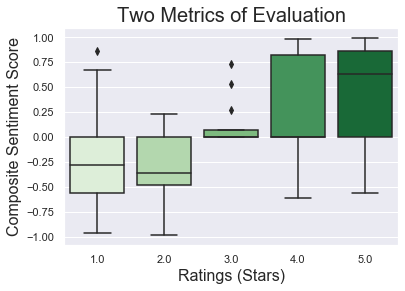

In [16]:
#Create box plot to explore relationship between ratings and sentiment scores
b=sns.boxplot( x=df1["score"], y=df1["score_comp"], palette="Greens");

b.axes.set_title("Two Metrics of Evaluation",fontsize=20)
b.set_xlabel("Ratings (Stars)",fontsize=16)
b.set_ylabel("Composite Sentiment Score",fontsize=16)

plt.show()

TREND: Sentiment scores increases as the number of stars in ratings increases

In [219]:
#expore review data with sentiment score to a csv file for further analyses
df1.to_csv('sentiment_stacked.csv', index=False)